In [1]:
# 分析时间：2013年1月1日-2022年12月31日，总共10年时间
# 但是在做特征分析的时候，可以把数据拉长。多搞一年：即2012-01-01至2022-12-31
feature_start_date_str = "2011-01-01"
start_date_str = "2012-01-01"
end_date_str = "2022-12-31"

In [2]:

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import QuantLib as ql
%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## 1.特征可视化

1. 可视化。
2. 相关性分析
3. 数据清洗

In [3]:
feature_start_date = datetime.datetime.strptime(feature_start_date_str, "%Y-%m-%d")
start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.datetime.strptime(end_date_str, "%Y-%m-%d")
print(feature_start_date, start_date, end_date)

2011-01-01 00:00:00 2012-01-01 00:00:00 2022-12-31 00:00:00


In [4]:
# 取出目标数据
# 到期收益率
raw_yield_to_maturity_df = pd.read_excel('./data/国债到期收益率.xlsx')
raw_yield_to_maturity_df = raw_yield_to_maturity_df.rename(columns={'指标名称': 'Date',
       '国债到期收益率:6个月': "6M", '国债到期收益率:1年': "1Y", '国债到期收益率:2年': "2Y", '国债到期收益率:3年': "3Y",
       '国债到期收益率:4年': "4Y", '国债到期收益率:5年': "5Y", '国债到期收益率:6年': "6Y", '国债到期收益率:7年': "7Y", 
        '国债到期收益率:8年': "8Y",'国债到期收益率:9年': "9Y", '国债到期收益率:10年': "10Y", '国债到期收益率:15年': "15Y", 
        '国债到期收益率:20年': "20Y", '国债到期收益率:30年': "30Y"})
raw_yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2008-07-01,3.2769,3.4474,3.8065,4.0301,4.1697,4.3093,4.3498,4.3903,4.4292,4.4682,4.5072,4.9618,4.9639,4.9498
1,2008-07-02,3.4055,3.5461,3.8015,3.9506,4.0883,4.2260,4.3019,4.3778,4.4282,4.4787,4.5291,4.9442,4.9462,4.9501
2,2008-07-03,3.3343,3.4972,3.8687,3.9820,4.1085,4.2350,4.3163,4.3976,4.4436,4.4896,4.5356,4.9453,4.9469,4.9501
3,2008-07-04,3.3397,3.4763,3.8179,3.9854,4.1031,4.2209,4.3183,4.4157,4.4618,4.5080,4.5542,4.9469,4.9479,4.9501
4,2008-07-07,3.3679,3.4796,3.8138,3.9561,4.0850,4.2140,4.2849,4.3559,4.4215,4.4871,4.5527,4.9226,4.9285,4.9404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2023-03-13,2.1958,2.2696,2.4373,2.5289,2.6127,2.6965,2.7655,2.8345,2.8473,2.8600,2.8728,3.0310,3.1147,3.2772
3668,2023-03-14,2.1950,2.2655,2.4475,2.5215,2.6046,2.6877,2.7591,2.8305,2.8417,2.8528,2.8640,3.0196,3.1047,3.2692
3669,2023-03-15,2.2050,2.2638,2.4432,2.5278,2.6121,2.6963,2.7663,2.8363,2.8474,2.8584,2.8695,3.0152,3.1033,3.2700
3670,2023-03-16,2.1799,2.2598,2.4193,2.5182,2.5953,2.6723,2.7483,2.8242,2.8342,2.8441,2.8541,2.9998,3.0857,3.2503


In [5]:
# 按特征长度选择数据
yield_to_maturity_df = raw_yield_to_maturity_df[(raw_yield_to_maturity_df['Date']>=feature_start_date)
                                                & (raw_yield_to_maturity_df['Date']<=end_date)].reset_index(drop=True)
yield_to_maturity_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2011-01-04,2.9635,3.0310,3.3571,3.3839,3.4591,3.5343,3.6066,3.6790,3.7370,3.7951,3.8531,4.0629,4.1640,4.2839
1,2011-01-05,2.9262,3.0047,3.1834,3.2891,3.3696,3.4500,3.5466,3.6432,3.6993,3.7553,3.8113,4.0108,4.1683,4.2554
2,2011-01-06,2.6401,2.8361,3.1205,3.2438,3.3567,3.4696,3.5691,3.6686,3.7146,3.7607,3.8067,4.0104,4.1645,4.2528
3,2011-01-07,2.6055,2.7599,3.1324,3.3165,3.3916,3.4667,3.5586,3.6505,3.7163,3.7820,3.8478,4.0208,4.1638,4.2649
4,2011-01-10,2.5607,2.7767,3.0750,3.2557,3.3469,3.4381,3.5293,3.6205,3.6891,3.7578,3.8264,4.0104,4.1569,4.2575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2022-12-26,2.1778,2.2398,2.3669,2.4616,2.5396,2.6175,2.7175,2.8175,2.8249,2.8324,2.8398,2.9777,3.0579,3.2225
2989,2022-12-27,2.2125,2.2615,2.3889,2.4898,2.5777,2.6656,2.7526,2.8395,2.8475,2.8556,2.8636,3.0014,3.0676,3.2182
2990,2022-12-28,2.2398,2.2732,2.4056,2.4746,2.5771,2.6795,2.7595,2.8395,2.8496,2.8598,2.8699,3.0078,3.0679,3.2125
2991,2022-12-29,2.1737,2.1952,2.3605,2.4405,2.5415,2.6425,2.7314,2.8202,2.8255,2.8309,2.8362,2.9741,3.0459,3.2021


In [6]:
date_benchmark = yield_to_maturity_df[["Date"]]
date_benchmark

,Date
0,2011-01-04
1,2011-01-05
2,2011-01-06
3,2011-01-07
4,2011-01-10
...,...
2988,2022-12-26
2989,2022-12-27
2990,2022-12-28
2991,2022-12-29


### 1.2经济增长

#### 1.2.1 GDP

In [7]:
# 读取GDP 
raw_gdp_df  = pd.read_excel("./data/features/GDP.xlsx")
raw_gdp_df

,指标名称,中国:GDP:现价:累计同比,中国:GDP:不变价:累计同比,中国:GDP:平减指数:GDP:累计同比,中国:GDP:现价,中国:GDP:不变价:当季值
0,1952-12-31,NaN,NaN,NaN,679.1,NaN
1,1953-12-31,NaN,15.6,NaN,824.4,NaN
2,1954-12-31,NaN,4.3,NaN,859.8,NaN
3,1955-12-31,NaN,6.9,NaN,911.6,NaN
4,1956-12-31,NaN,15.0,NaN,1030.7,NaN
...,...,...,...,...,...,...
159,2021-12-31,12.57,8.4,4.5991,1149237.0,306681.3
160,2022-03-31,8.37,4.8,3.9621,NaN,257286.1
161,2022-06-30,5.73,2.5,3.6817,NaN,269674.4
162,2022-09-30,5.73,3.0,3.1439,NaN,289504.9


In [8]:
# 由于"中国:GDP:现价"是年度数据，剔除
gdp_df =  raw_gdp_df[['指标名称', '中国:GDP:现价:累计同比', '中国:GDP:不变价:累计同比', '中国:GDP:平减指数:GDP:累计同比',
                          '中国:GDP:不变价:当季值']]
gdp_df = gdp_df.rename(columns={'指标名称': "Date", "中国:GDP:现价:累计同比":"CN_GDP_Current_Price_Cum_YTY",
                                       "中国:GDP:不变价:累计同比": "CN_GDP_Constant_Price_Cum_YTY",
                                       "中国:GDP:平减指数:GDP:累计同比":"CN_GDP_Deflator_GDP_Cum_YTY",
                                       "中国:GDP:不变价:当季值": "CN_GDP_Constant_Current_Q"})
gdp_df

,Date,CN_GDP_Current_Price_Cum_YTY,CN_GDP_Constant_Price_Cum_YTY,CN_GDP_Deflator_GDP_Cum_YTY,CN_GDP_Constant_Current_Q
0,1952-12-31,NaN,NaN,NaN,NaN
1,1953-12-31,NaN,15.6,NaN,NaN
2,1954-12-31,NaN,4.3,NaN,NaN
3,1955-12-31,NaN,6.9,NaN,NaN
4,1956-12-31,NaN,15.0,NaN,NaN
...,...,...,...,...,...
159,2021-12-31,12.57,8.4,4.5991,306681.3
160,2022-03-31,8.37,4.8,3.9621,257286.1
161,2022-06-30,5.73,2.5,3.6817,269674.4
162,2022-09-30,5.73,3.0,3.1439,289504.9


In [9]:
gdp_df = gdp_df[(gdp_df['Date']>=feature_start_date)
                                                & (gdp_df['Date']<=end_date)].reset_index(drop=True)
gdp_df = pd.merge(date_benchmark, gdp_df, on="Date", how="left")
# 采用向下填充
gdp_df = gdp_df.fillna(method='ffill')
gdp_df

,Date,CN_GDP_Current_Price_Cum_YTY,CN_GDP_Constant_Price_Cum_YTY,CN_GDP_Deflator_GDP_Cum_YTY,CN_GDP_Constant_Current_Q
0,2011-01-04,NaN,NaN,NaN,NaN
1,2011-01-05,NaN,NaN,NaN,NaN
2,2011-01-06,NaN,NaN,NaN,NaN
3,2011-01-07,NaN,NaN,NaN,NaN
4,2011-01-10,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2988,2022-12-26,5.73,3.0,3.1439,289504.9
2989,2022-12-27,5.73,3.0,3.1439,289504.9
2990,2022-12-28,5.73,3.0,3.1439,289504.9
2991,2022-12-29,5.73,3.0,3.1439,289504.9


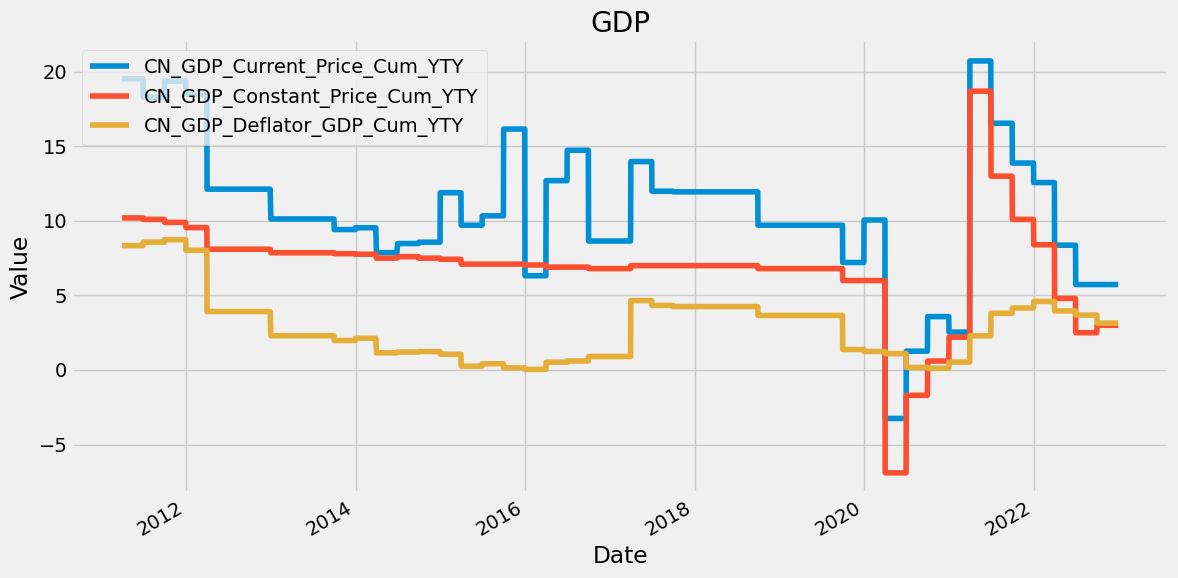

In [10]:
# 数据可视化
# 数据可视化


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(gdp_df['Date'], gdp_df['CN_GDP_Current_Price_Cum_YTY'], label="CN_GDP_Current_Price_Cum_YTY")
ax.plot(gdp_df['Date'], gdp_df['CN_GDP_Constant_Price_Cum_YTY'], label="CN_GDP_Constant_Price_Cum_YTY")
ax.plot(gdp_df['Date'], gdp_df['CN_GDP_Deflator_GDP_Cum_YTY'], label="CN_GDP_Deflator_GDP_Cum_YTY")
#ax.plot(gdp_df['Date'], gdp_df['CN_GDP_Constant_Current_Q'], label="CN_GDP_Constant_Current_Q")



ax.set_title("GDP")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=2)

#### 1.2.2 固定资产投资完成额(月)

Investment in fixed assets completed (month)

In [11]:
raw_investment_fac_df  = pd.read_excel("./data/features/固定资产投资完成额(月).xlsx")
raw_investment_fac_df = raw_investment_fac_df.rename(columns={"指标名称": "Date", "中国:固定资产投资完成额:累计同比": "CN_IFA_Cum_MTM"})
raw_investment_fac_df

,Date,CN_IFA_Cum_MTM
0,1992-02-29,56.7
1,1992-06-30,31.0
2,1992-07-31,32.0
3,1992-08-31,33.0
4,1992-09-30,33.0
...,...,...
334,2022-09-30,5.9
335,2022-10-31,5.8
336,2022-11-30,5.3
337,2022-12-31,5.1


In [12]:
def clean_data(raw_df, date_benchmark, feature_start_date, end_date):
    clean_df = raw_df[(raw_df['Date']>=feature_start_date) & (raw_df['Date']<=end_date)].reset_index(drop=True)
    investment_fac_df = pd.merge(date_benchmark, clean_df, on="Date", how="left")
    # 采用向下填充
    clean_df = clean_df.fillna(method='ffill')
    return clean_df

investment_fac_df = clean_data(raw_investment_fac_df, date_benchmark, feature_start_date, end_date)
investment_fac_df

,Date,CN_IFA_Cum_MTM
0,2011-02-28,24.9
1,2011-03-31,25.0
2,2011-04-30,25.4
3,2011-05-31,25.8
4,2011-06-30,25.6
...,...,...
127,2022-08-31,5.8
128,2022-09-30,5.9
129,2022-10-31,5.8
130,2022-11-30,5.3


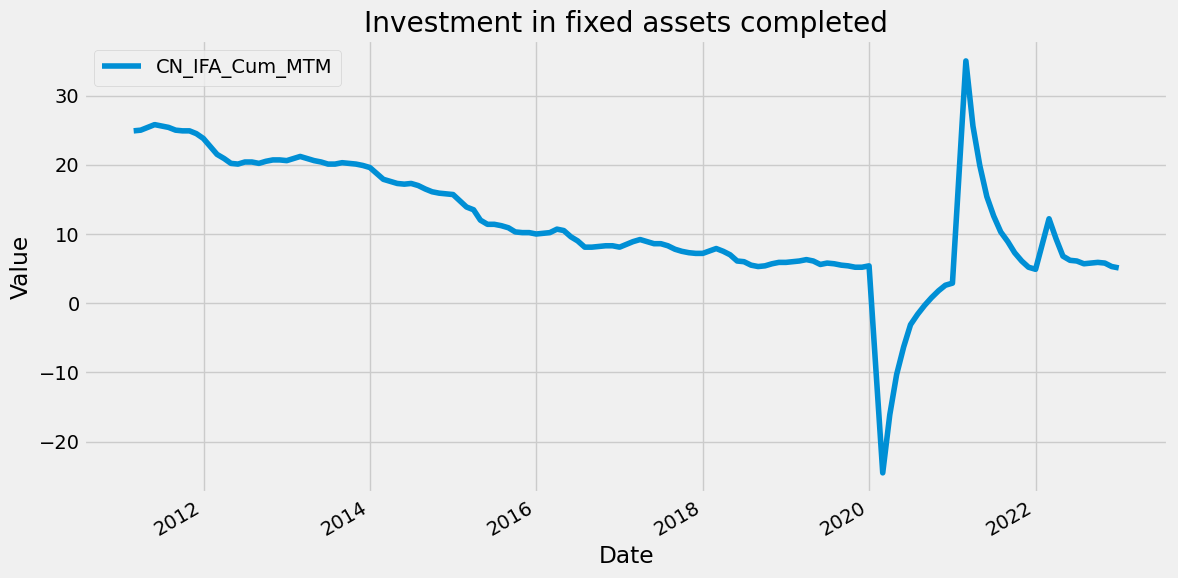

In [13]:
def plot_features(clean_df, col_name_list, title="Investment in fixed assets completed"):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for temp_col in col_name_list:
        ax.plot(clean_df['Date'], clean_df[temp_col], label=temp_col)
        

    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.legend(loc=2)
    plt.show()

plot_features(investment_fac_df, ["CN_IFA_Cum_MTM"], title="Investment in fixed assets completed")


#### 中国库存投资

Chinese inventory investment

In [14]:
raw_cii_df  = pd.read_excel("./data/features/中国库存投资.xlsx")
raw_cii_df = raw_cii_df.rename(columns={"指标名称": "Date", 
                                        "中国:工业企业:产成品存货:同比": "CN_IE_FGI_MTM",
                                       "中国:PMI:新订单": "CN_PMI_New_Order",
                                       "中国:PMI:主要原材料购进价格":"CN_PMI_RMP"})
raw_cii_df

,Date,CN_IE_FGI_MTM,CN_PMI_New_Order,CN_PMI_RMP
0,1996-02-29,23.6,NaN,NaN
1,1996-03-31,24.6,NaN,NaN
2,1996-04-30,24.5,NaN,NaN
3,1996-05-31,23.4,NaN,NaN
4,1996-06-30,22.6,NaN,NaN
...,...,...,...,...
312,2022-10-31,12.6,48.1,53.3
313,2022-11-30,11.4,46.4,50.7
314,2022-12-31,9.9,43.9,51.6
315,2023-01-31,NaN,50.9,52.2


In [15]:
cii_df = clean_data(raw_cii_df, date_benchmark, feature_start_date, end_date)
cii_df

,Date,CN_IE_FGI_MTM,CN_PMI_New_Order,CN_PMI_RMP
0,2011-01-31,NaN,54.9,69.3
1,2011-02-28,22.04,54.3,70.1
2,2011-03-31,23.15,55.2,68.3
3,2011-04-30,23.16,53.8,66.2
4,2011-05-31,22.62,52.1,60.3
...,...,...,...,...
139,2022-08-31,14.10,49.2,44.3
140,2022-09-30,13.80,49.8,51.3
141,2022-10-31,12.60,48.1,53.3
142,2022-11-30,11.40,46.4,50.7


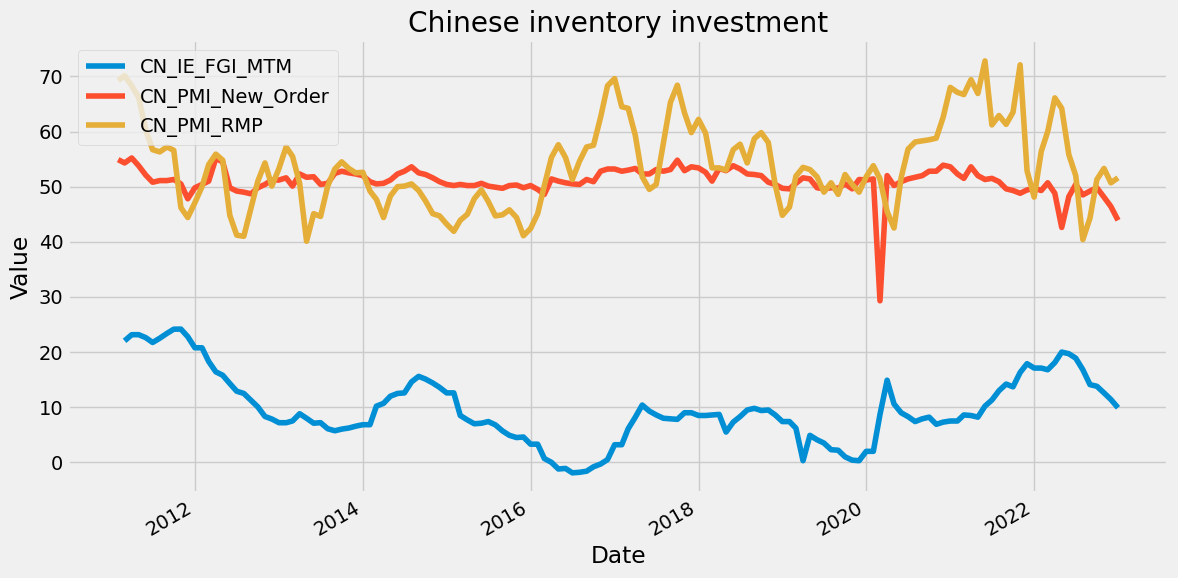

In [16]:


plot_features(cii_df, ["CN_IE_FGI_MTM", "CN_PMI_New_Order", "CN_PMI_RMP"], title="Chinese inventory investment")


#### 消费

consumption

In [17]:
raw_consumption_df = pd.read_excel("./data/features/消费.xlsx")

raw_consumption_df = raw_consumption_df[["指标名称",'中国:社会消费品零售总额:累计同比', '中国:公共财政支出:当月同比']]
raw_consumption_df = raw_consumption_df.rename(columns={"指标名称": "Date", 
                                        "中国:社会消费品零售总额:累计同比": "CN_TRSCG_Cum_MOM",
                                       "中国:公共财政支出:当月同比": "CN_PFE_MOM"})
raw_consumption_df

,Date,CN_TRSCG_Cum_MOM,CN_PFE_MOM
0,1952-12-31,NaN,NaN
1,1953-12-31,25.72,NaN
2,1954-12-31,9.51,NaN
3,1955-12-31,2.91,NaN
4,1956-12-31,17.54,NaN
...,...,...,...
426,2022-09-30,0.70,5.3925
427,2022-10-31,0.60,8.7060
428,2022-11-30,-0.10,4.7989
429,2022-12-31,-0.20,2.9508


In [18]:
consumption_df = clean_data(raw_consumption_df, date_benchmark, feature_start_date, end_date)
consumption_df

,Date,CN_TRSCG_Cum_MOM,CN_PFE_MOM
0,2011-01-31,19.90,84.9200
1,2011-02-28,15.80,-17.5200
2,2011-03-31,16.34,27.8000
3,2011-04-30,16.50,31.0000
4,2011-05-31,16.60,42.9000
...,...,...,...
135,2022-08-31,0.50,5.6355
136,2022-09-30,0.70,5.3925
137,2022-10-31,0.60,8.7060
138,2022-11-30,-0.10,4.7989


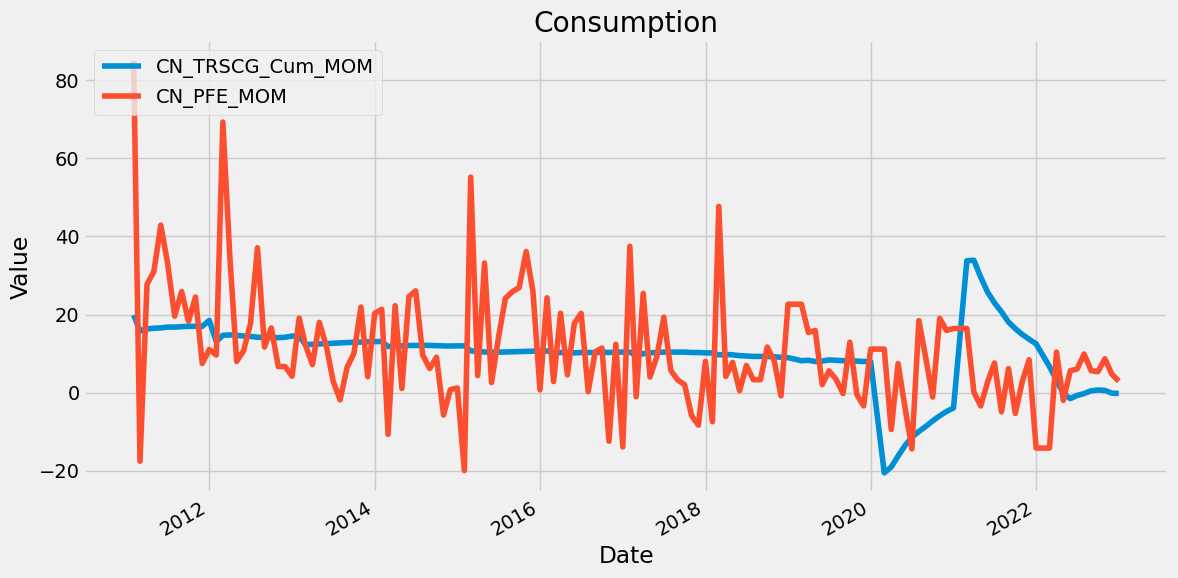

In [19]:
plot_features(consumption_df, ["CN_TRSCG_Cum_MOM", "CN_PFE_MOM"], title="Consumption")

#### 进出口

import and export

In [20]:
raw_import_export_df = pd.read_excel("./data/features/进出口.xlsx")
raw_import_export_df = raw_import_export_df.rename(columns={
    "指标名称": "Date",
    "中国:进口金额:进料加工贸易:当月同比": "CN_Import_Trade_MOM",
    "现价:全球:GDP": "Global_GDP_CP",
    "中国:出口金额:人民币:当月同比": "CN_Export_MOM",
    "OECD综合领先指标": "OECD", 
    "中国:人民币:实际有效汇率指数": "CN_RMB_RE_Exchange_Rate", 
    "中国:PMI": "CN_PMI"
})
raw_import_export_df

,Date,CN_Import_Trade_MOM,Global_GDP_CP,CN_Export_MOM,OECD,CN_RMB_RE_Exchange_Rate,CN_PMI
0,1960-12-31,NaN,1.392273e+06,NaN,NaN,NaN,NaN
1,1961-01-31,NaN,NaN,NaN,99.81307,NaN,NaN
2,1961-02-28,NaN,NaN,NaN,99.94716,NaN,NaN
3,1961-03-31,NaN,NaN,NaN,100.12330,NaN,NaN
4,1961-04-30,NaN,NaN,NaN,100.31430,NaN,NaN
...,...,...,...,...,...,...,...
742,2022-10-31,-5.3,NaN,6.9,98.78837,99.39,49.2
743,2022-11-30,-25.4,NaN,0.6,98.69103,96.84,48.0
744,2022-12-31,-26.0,NaN,-0.5,NaN,97.39,47.0
745,2023-01-31,NaN,NaN,NaN,NaN,98.07,50.1


In [21]:
import_export_df = clean_data(raw_import_export_df, date_benchmark, feature_start_date, end_date)
import_export_df

,Date,CN_Import_Trade_MOM,Global_GDP_CP,CN_Export_MOM,OECD,CN_RMB_RE_Exchange_Rate,CN_PMI
0,2011-01-31,NaN,NaN,NaN,100.80440,81.67,52.9
1,2011-02-28,NaN,NaN,NaN,100.81320,82.09,52.2
2,2011-03-31,NaN,NaN,NaN,100.75530,80.82,53.4
3,2011-04-30,NaN,NaN,NaN,100.63410,79.90,52.9
4,2011-05-31,NaN,NaN,NaN,100.46050,80.03,52.0
...,...,...,...,...,...,...,...
139,2022-08-31,-8.5,9.652743e+07,12.1,99.06400,101.86,49.4
140,2022-09-30,-10.2,9.652743e+07,10.5,98.91106,101.09,50.1
141,2022-10-31,-5.3,9.652743e+07,6.9,98.78837,99.39,49.2
142,2022-11-30,-25.4,9.652743e+07,0.6,98.69103,96.84,48.0


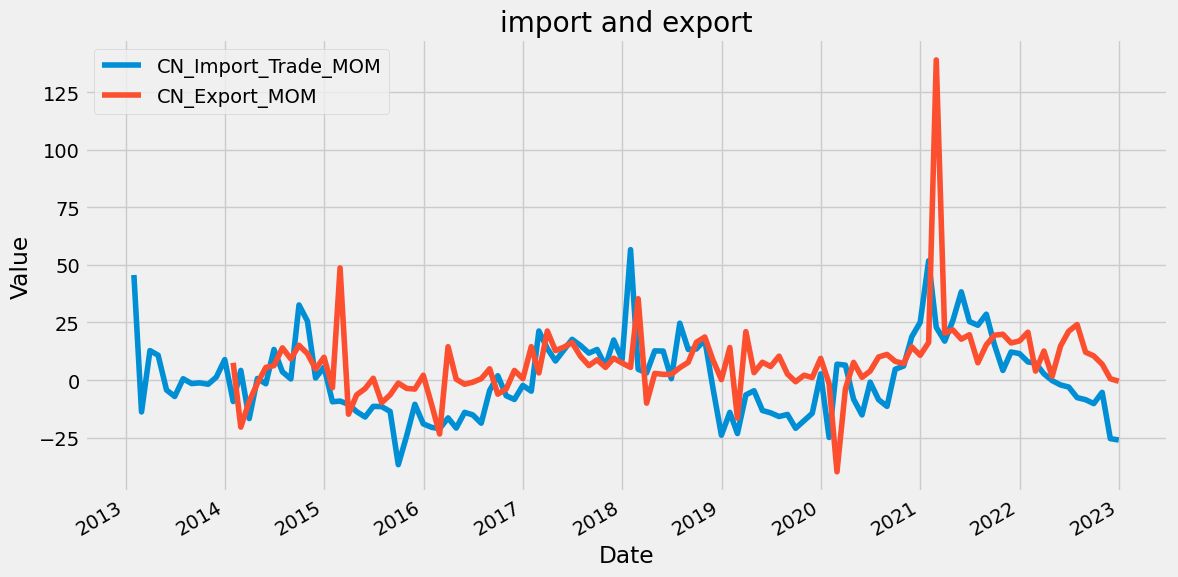

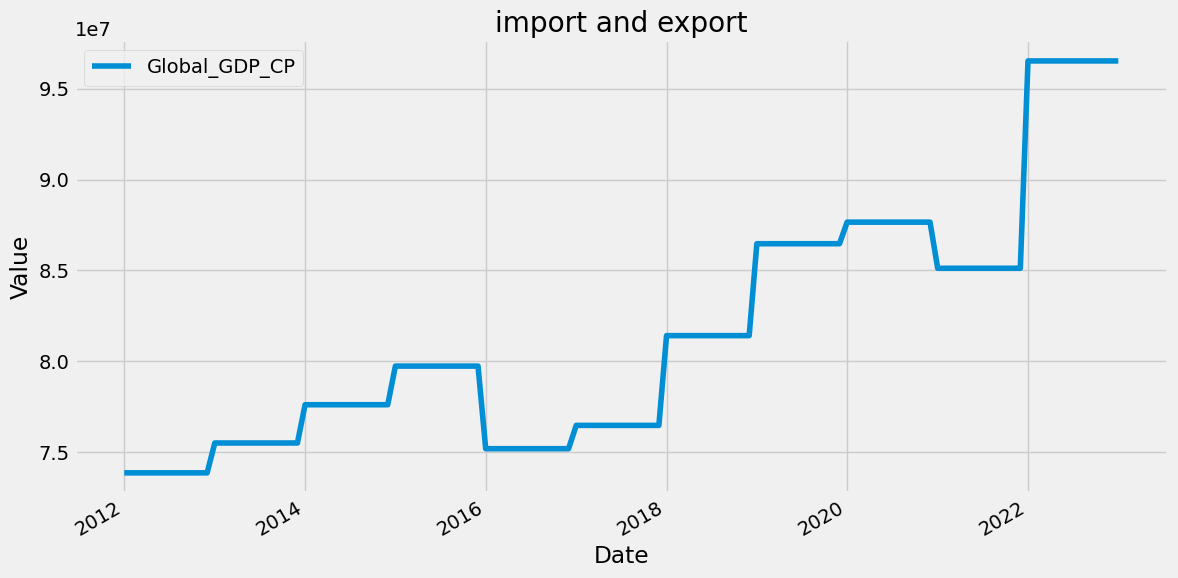

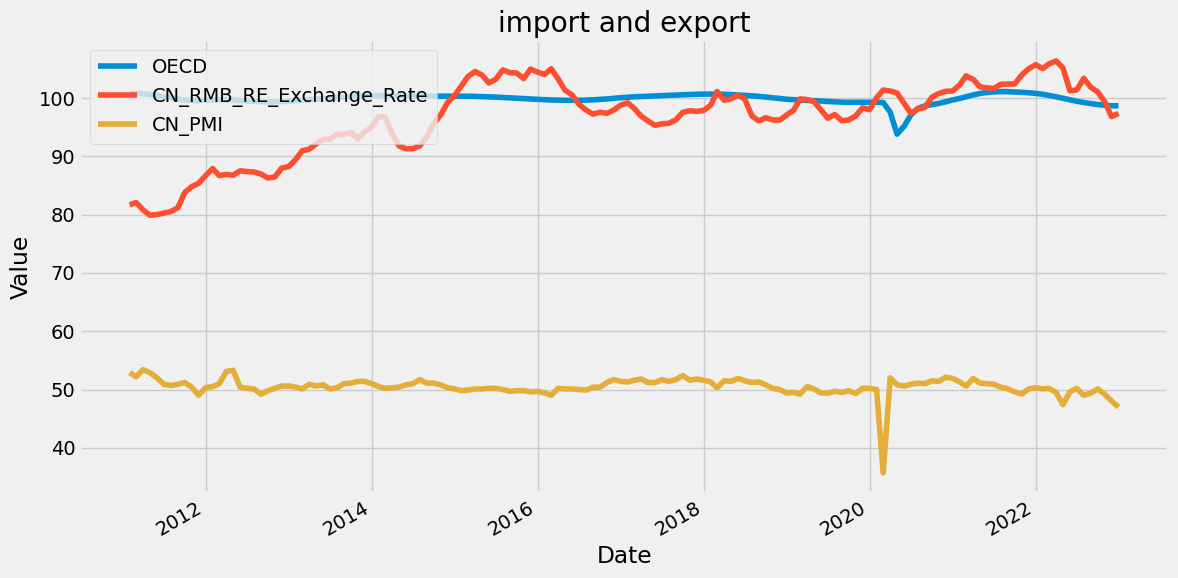

In [22]:
plot_features(import_export_df, ["CN_Import_Trade_MOM", 
                                 "CN_Export_MOM"], title="import and export")

plot_features(import_export_df, ["Global_GDP_CP"], title="import and export")

plot_features(import_export_df, ["OECD","CN_RMB_RE_Exchange_Rate","CN_PMI"], title="import and export")

## 合并数据

In [23]:
#经济增长
#economic growth

result_df = date_benchmark
from functools import reduce
data_frames = [gdp_df, investment_fac_df, cii_df, consumption_df, import_export_df]
for temp in data_frames:
    result_df = result_df.merge(temp, on="Date", how="left")
result_df

,Date,CN_GDP_Current_Price_Cum_YTY,CN_GDP_Constant_Price_Cum_YTY,CN_GDP_Deflator_GDP_Cum_YTY,CN_GDP_Constant_Current_Q,CN_IFA_Cum_MTM,CN_IE_FGI_MTM,CN_PMI_New_Order,CN_PMI_RMP,CN_TRSCG_Cum_MOM,CN_PFE_MOM,CN_Import_Trade_MOM,Global_GDP_CP,CN_Export_MOM,OECD,CN_RMB_RE_Exchange_Rate,CN_PMI
0,2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2022-12-26,5.73,3.0,3.1439,289504.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2989,2022-12-27,5.73,3.0,3.1439,289504.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2990,2022-12-28,5.73,3.0,3.1439,289504.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,2022-12-29,5.73,3.0,3.1439,289504.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
result_df.to_csv("./data/clean_features/features_economic_growth.csv", index=False, encoding="utf-8-sig")

In [25]:
result_df.describe()

,CN_GDP_Current_Price_Cum_YTY,CN_GDP_Constant_Price_Cum_YTY,CN_GDP_Deflator_GDP_Cum_YTY,CN_GDP_Constant_Current_Q,CN_IFA_Cum_MTM,CN_IE_FGI_MTM,CN_PMI_New_Order,CN_PMI_RMP,CN_TRSCG_Cum_MOM,CN_PFE_MOM,CN_Import_Trade_MOM,Global_GDP_CP,CN_Export_MOM,OECD,CN_RMB_RE_Exchange_Rate,CN_PMI
count,2934.000000,2934.000000,2934.000000,2934.000000,95.00000,99.000000,100.000000,100.000000,99.000000,99.000000,81.000000,9.100000e+01,74.000000,100.000000,100.000000,100.000000
mean,10.708381,6.909297,2.891541,184730.313020,11.66000,10.043737,51.211000,54.085000,10.003250,11.626643,2.471605,8.136287e+07,7.301216,99.882807,96.322300,50.636000
std,4.664402,3.596229,2.257033,55226.148731,8.15087,6.321724,1.684624,7.572563,8.098237,16.434600,17.062541,6.769747e+06,11.462583,0.922350,6.708643,0.955317
min,-3.250000,-6.900000,0.035700,98902.800000,-16.10000,-1.900000,46.400000,41.000000,-19.000000,-17.520000,-36.700000,7.385746e+07,-23.400000,93.824460,80.030000,48.000000
25%,8.570000,6.800000,1.055300,137370.400000,6.00000,6.915000,50.175000,48.025000,9.250000,2.453487,-10.500000,7.550039e+07,1.125000,99.603500,93.020000,50.100000
50%,10.130000,7.041329,2.296800,183177.800000,9.60000,8.500000,51.050000,53.300000,10.426400,9.095300,0.700000,7.973264e+07,7.940000,99.973095,97.485000,50.400000
75%,12.570000,7.863736,4.159200,224846.800000,19.75000,13.950000,52.300000,58.550000,13.900000,19.222350,13.300000,8.646696e+07,14.397500,100.411550,101.230000,51.200000
max,20.730000,18.700000,8.740600,306681.300000,25.80000,24.170000,55.200000,72.800000,33.900000,84.920000,56.600000,9.652743e+07,48.700000,101.107900,106.390000,53.400000
